In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv") 
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv") 

In [3]:
print(train.shape,'\n',test.shape)

(1460, 81) 
 (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.Alley.nunique()

2

In [7]:
train.dropna(axis=1,inplace=True)

In [8]:
train.shape

(1460, 62)

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [11]:
int_col=train.loc[:, train.dtypes == np.int64].columns.tolist()

In [12]:
train[int_col]=train[int_col].astype(np.int32)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int32 
 1   MSSubClass     1460 non-null   int32 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int32 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int32 
 16  OverallCond    1460 non-null   int32 
 17  YearBuilt      1460 non-null   int32 
 18  YearRemodAdd   1460 non-null

Уверен что int64 это много так что downcasting делаем

In [14]:
col_cor=(train.select_dtypes(include=np.int32).corr()['SalePrice'][:-1]>=0.5).tolist()    

Смотрим corr каждого инт значения для скатер плота

In [15]:
col_corr=[]
for i in range(len(col_cor)):
    if(col_cor[i]==True):
        col_corr.append(train.columns[i])

In [16]:
col_corr

['LotArea',
 'LotShape',
 'LandContour',
 'Neighborhood',
 'Condition1',
 'HouseStyle',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'ExterCond']

In [17]:
y=train['SalePrice'].values

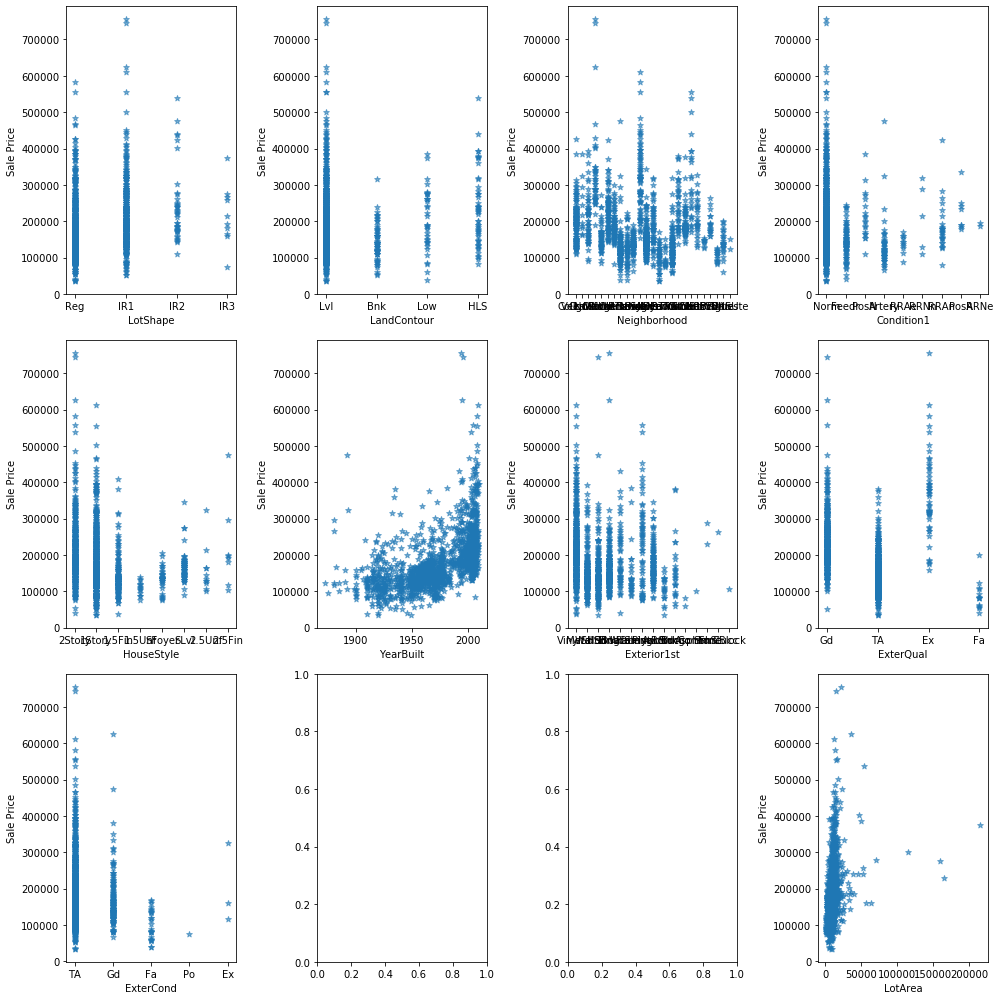

In [18]:
fig, ax = plt.subplots(3,4,figsize=(14,14))
i=0
for il in col_corr:
    plt.scatter(train[il],y,marker="*",alpha=0.6)
    i+=1
    plt.xlabel(il)
    plt.ylabel("Sale Price")
    plt.subplot(3,4,i)
    
    
    
plt.tight_layout()
plt.show()

Почему то он не взял только нумерики

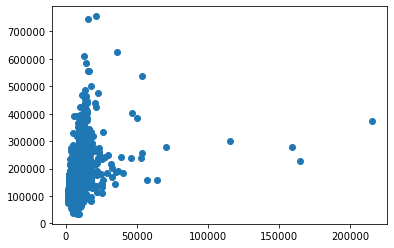

In [19]:
plt.scatter(train['LotArea'].values,y)

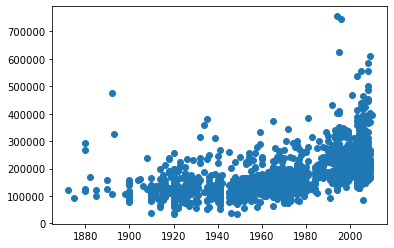

In [20]:
plt.scatter(train['YearBuilt'].values,y)

Замечается линейная зависимость

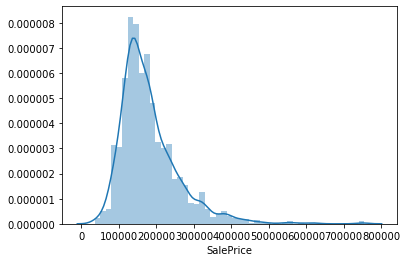

In [21]:
import seaborn as sns
sns.distplot(train.SalePrice)

 normal distribution

In [22]:
train.shape

(1460, 62)

In [23]:
pd.get_dummies(train)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
X=pd.get_dummies(train.drop(['SalePrice','Id'],1)).values
y=train['SalePrice'].values

In [25]:
print(X.shape,y.shape)

(1460, 215) (1460,)


In [26]:
from sklearn.model_selection import train_test_split
X_trains,X_test,y_trains,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_trains,y_trains)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = reg.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

29772.073560443427

In [30]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3,early_stopping=True)
clf.fit(X_trains, y_trains)

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [31]:
y_pred=clf.predict(X_test)

In [32]:
mean_squared_error(y_test, y_pred, squared=False)

1.7809971918433635e+17

если верить калькулятору https://www.desmos.com/scientific то здесь число 20.11975162 но чет мне так не кажется

In [33]:
test.dropna(axis=1,inplace=True)

In [34]:
loo_sum = train.groupby('YearBuilt')['SalePrice'].transform('sum')

loo_count = train.groupby('YearBuilt')['SalePrice'].transform('count')

train['SalePrice_enc'] = (loo_sum - train['SalePrice'])/(loo_count - 1)

In [35]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_enc
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,227838.318182
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,163279.843750
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,243636.842105
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,133763.888889
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,209060.869565


 получилось сделать mean encoding через loo

теперь добавим ее к нашей модели

In [36]:
train['SalePrice_enc'].astype(np.int32)

ValueError: Cannot convert non-finite values (NA or inf) to integer

Жалуется что есть нанки или бесконечное число

In [37]:
np.any(np.isnan(train['SalePrice_enc']))

True

есть нанка

In [38]:
train['SalePrice_enc'].fillna(train['SalePrice_enc'].mean(),inplace=True)

In [39]:
train['SalePrice_enc'].astype(np.float32)

0       227838.312500
1       163279.843750
2       243636.843750
3       133763.890625
4       209060.875000
            ...      
1455    212098.671875
1456    157693.328125
1457    110500.000000
1458    127294.734375
1459    153360.125000
Name: SalePrice_enc, Length: 1460, dtype: float32

Врятли кто то будет ставить цены вплоть до центов так что меняем float64 на int32. Думал я так когда не посмотрел формат сабмишена где он был float значением.

In [40]:
X=pd.get_dummies(train.drop(['SalePrice','Id'],1)).values
y=train['SalePrice'].values

In [41]:
from sklearn.model_selection import train_test_split
X_trains,X_test,y_trains,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
reg = LinearRegression()
reg.fit(X_trains,y_trains)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred = reg.predict(X_test)

In [44]:
mean_squared_error(y_test, y_pred, squared=False)

29988.878038181774

Это только ухудшило результат

In [45]:
train['SalePrice'].max()

755000

In [46]:
import lightgbm as lgb
d_train = lgb.Dataset(X_trains, label=y_trains)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 30,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
clf = lgb.train(params,
                d_train,
                num_boost_round=100)

In [47]:
y_pred=clf.predict(X_test)

In [48]:
mean_squared_error(y_test, y_pred, squared=False)

29506.06125799763

In [49]:
test.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,1,2010,Normal


In [50]:
pred=clf.predict(X)

In [51]:
X=pd.get_dummies(train.drop(['SalePrice','Id','SalePrice_enc'],1)).values
y=train['SalePrice'].values

In [52]:
X_trains,X_test,y_trains,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
import lightgbm as lgb
d_train = lgb.Dataset(X_trains, label=y_trains)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 30,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
clf = lgb.train(params,
                d_train,
                num_boost_round=100)

In [54]:
y_pred=clf.predict(X_test)

In [55]:
mean_squared_error(y_test, y_pred, squared=False)

29682.554847788324

mean encoding не помог

In [56]:
pred=clf.predict(X)

In [57]:
pred=pred[-1]

In [58]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": pred
    })

In [59]:
#submission.to_csv('predict.csv',index=False)